In [1]:
import sys
sys.path.insert(0, '../../dataset/Dataset Processing/')
sys.path.insert(0, '../../Heuristic based Approaches/Path Scanning Algorithm')

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import time
import heapq
from data_processing import *
from path_scanning import *

In [3]:
# def createGraph(depotNodes ,requiredEdges, numNodes, show=True):
#     G = nx.Graph()
#     edges = []
#     pos = {}
#     reqPos = {}
#     s = [1, 1, 2, 2, 3, 3, 4, 4, 4, 5, 6, 7]
#     t = [2, 3, 4, 6, 4, 5, 5, 7, 6, 8, 7, 8]
#     weights = [2.3, 2, 3, 1.5, 3.2, 2.2, 3.8, 2.6, 2.2, 2.8, 1.8, 0.8]
#     xData = [-2, -0.5, -1,   0, 1,  1.5, 2,   2.5];
#     yData = [ 0, -2,    2.5, 0, 3, -2,   0.3, 1.5];
#     for i in range(len(s)):
#         edges.append((s[i], t[i], weights[i]))
    
#     for i in range(1, numNodes+1):
#         G.add_node(i)
#         pos[i] =(xData[i-1], yData[i-1])
    
#     node_color = ['y']*int(G.number_of_nodes())
#     depot_node_color = node_color
#     for i in range(1, len(node_color)+1):
#         if i in depotNodes:
#             depot_node_color[i-1] = 'g'
            
#     G.add_weighted_edges_from(edges)
#     labels = nx.get_edge_attributes(G,'weight')
#     nx.draw_networkx(G,pos, node_color = node_color)
#     nx.draw_networkx(G,pos, node_color = depot_node_color)
#     nx.draw_networkx_edges(G, pos, edgelist=requiredEdges, width=3, alpha=0.5,
#                                         edge_color="r")
#     nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
#     if show:
#         plt.figure(1)
#         plt.show()
#     return G,pos, depot_node_color

In [4]:
# def drawGraph(G, depotNodes, requiredEdges):
#     pos = {}
#     node_color = ['y']*int(G.number_of_nodes())
#     depot_node_color = node_color
#     s = [1, 1, 2, 2, 3, 3, 4, 4, 4, 5, 6, 7]
#     t = [2, 3, 4, 6, 4, 5, 5, 7, 6, 8, 7, 8]
#     weights = [2.3, 2, 3, 1.5, 3.2, 2.2, 3.8, 2.6, 2.2, 2.8, 1.8, 0.8]
#     xData = [-2, -0.5, -1,   0, 1,  1.5, 2,   2.5];
#     yData = [ 0, -2,    2.5, 0, 3, -2,   0.3, 1.5];
    
#     for i in range(len(s)):
#         if not G.has_edge(s[i],t[i]):
#             del weights[i]
    
#     for i in range(1, len(node_color)+1):
#         if i in depotNodes:
#             depot_node_color[i-1] = 'g'
    
#     for i in range(1, len(G.nodes())+1):
#         pos[i] =(xData[i-1], yData[i-1])
    
#     labels = nx.get_edge_attributes(G,'weight')
#     nx.draw_networkx(G,pos, node_color = node_color)
#     nx.draw_networkx(G,pos, node_color = depot_node_color)
#     nx.draw_networkx_edges(G, pos, edgelist=requiredEdges, width=3, alpha=0.5,
#                                         edge_color="r")
#     nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
#     plt.figure(1)
#     plt.show()

In [5]:
# # Allocating task based on distance between base station and desired edge and UAV availability
# def taskAllocation(G, depotNodes, requiredNodes, numrequiredEdges, uavsInDepotNodes):
#     depotNodesCost = np.zeros((len(depotNodes), numrequiredEdges))
#     depotPath = []
#     bestPathTillDesiredEdge = []
#     bestCostTillDesiredEdge = []

#     for j in range(numrequiredEdges):
#         for i in range(len(depotNodes)):
#             c1 = nx.dijkstra_path_length(G, source=depotNodes[i], target=requiredNodes[j][0])
#             c2 = nx.dijkstra_path_length(G, source=depotNodes[i], target=requiredNodes[j][1])
#             l = []
#             if c1 <= c2:
#                 l = nx.dijkstra_path(G, source=depotNodes[i], target=requiredNodes[j][0])
#                 l.append(requiredNodes[j][1])
#             else:
#                 l = nx.dijkstra_path(G, source=depotNodes[i], target=requiredNodes[j][1])
#                 l.append(requiredNodes[j][0])
#             depotNodesCost[i,j] = min(c1,c2)
#             depotNodesCost[i,j] += G.get_edge_data(requiredNodes[j][0], requiredNodes[j][1])['weight']
#             depotPath.append(l)
            
#         if uavsInDepotNodes[np.argmin(depotNodesCost[:,j])] > 0:
#                 uavsInDepotNodes[np.argmin(depotNodesCost[:,j])] -= 1
#         else:
#             depotNodesCost[np.argmin(depotNodesCost[:,j]),j] = np.inf
    
#     depotPath = np.transpose(np.array(depotPath, dtype=object).reshape((numrequiredEdges, len(depotNodes))))
#     taskAllocatedtoBaseStations = []
#     print("Task Allocation Algorithm Output: ")
#     for i in range(numrequiredEdges):
#         taskAllocatedtoBaseStations.append(np.argmin(depotNodesCost[:,i]))
#         bestCostTillDesiredEdge.append(depotNodesCost[taskAllocatedtoBaseStations[i],i])
#         bestPathTillDesiredEdge.append(depotPath[taskAllocatedtoBaseStations[i],i])
#         print('Allocating arc ' + str(requiredNodes[i][0]) + ' - ' + str(requiredNodes[i][1]) + ' to base station - node ' + str(depotNodes[taskAllocatedtoBaseStations[i]]))
    
#     return bestPathTillDesiredEdge, bestCostTillDesiredEdge

In [6]:
# def visualizePath(depotNodes, requiredNodes, numNodes, path, pathType="solution"):
#     plt.figure(1)
#     for j in range(len(path)):
#         if path[j] != None:
# #             plt.figure(j+1)
#             G, pos, depot_node_color = createGraph(depotNodes, requiredNodes , numNodes, show=False)
#             G1 = nx.DiGraph()
#             pos1 = {}
#             node_color = []
#             edges = []
#             for i in range(len(path[j])-1):
#                 edges.append((path[j][i], path[j][i+1], G.get_edge_data(path[j][i], path[j][i+1])['weight']))
#                 pos1[path[j][i]] = pos[path[j][i]]
#                 if i == len(path[j])-2:
#                     pos1[path[j][i+1]] = pos[path[j][i+1]]

#             for key in pos1.keys():
#                 node_color.append(depot_node_color[key-1])

#             G1.add_weighted_edges_from(edges)
#             nx.draw_networkx(G1,pos1, arrows=True, node_color = node_color, edge_color='b', arrowsize=12, width=1, arrowstyle='simple')
#             if pathType == "solution":
#                 plt.legend(["Solution Path"], loc ="upper left")
#             else:
#                 plt.legend(["Path"], loc ="upper left")
#             plt.show()

In [7]:
# def constructAndStrike(G, numrequiredEdges, requiredNodes, depotNodes, bestPathTillDesiredEdge, bestCostTillDesiredEdge, vehicleCapacity):
#     bestRoute = []
#     bestRouteCost = []
#     minCost = np.inf
#     for j in range(numrequiredEdges):
#         minCost = np.inf
#         l = []
#         for i in range(len(depotNodes)):
#             c1 = nx.dijkstra_path_length(G, source=bestPathTillDesiredEdge[j][-1], target=depotNodes[i])
#             if c1 <= minCost:
#                 l = nx.dijkstra_path(G, source=bestPathTillDesiredEdge[j][-1], target=depotNodes[i])[1:]
#                 minCost = c1
#         bestRoute.append(bestPathTillDesiredEdge[j] + l)
#         bestRouteCost.append(bestCostTillDesiredEdge[j] + minCost)
#         if bestRouteCost[j] > vehicleCapacity:
#             bestRoute[j] = None
#             bestRouteCost[j] = np.inf       #---Construct Phase----#
            
#         if bestRoute[j] is not None:
# #             visualizePath(depotNodes, requiredNodes, numNodes, [bestRoute[j]], pathType="normal")
            
#             if G.degree(bestRoute[j][0]) > 1 and G.degree(bestRoute[j][-1]) > 1:
#                 for i in range(len(bestRoute[j])-1):
#                     if G.has_edge(bestRoute[j][i], bestRoute[j][i+1]):
#                         G.remove_edge(bestRoute[j][i], bestRoute[j][i+1])
# #             if j <= numrequiredEdges-2:
# #                 drawGraph(G, depotNodes, [requiredNodes[j+1]])
        
#     print("Path Scanning Algorithm Output: ")
#     return bestRoute, bestRouteCost

In [8]:
def nodeIndex(G, route, requiredNodes):
    ind = 0
    ind1 = 0
    
    for nodes in requiredNodes:
        if arcTraversed(G, route, nodes[0], nodes[1]):
            ind = route.index(nodes[0])
            ind1 = route.index(nodes[1])
            break
#     for i, node in enumerate(route):
#         for requNode in requiredNodes:
#             if node in requNode and route[i+1] in requNode:
#                 ind = i
#                 ind1 = i+1
#                 break
    
    return route[ind], route[ind1]

In [9]:
def closestRequiredNode(G, ele, startNode, endNode, minRoute, minRouteCost, addFirstNode = False):
    c1 = nx.dijkstra_path_length(G, source=ele, target=startNode)
    c2 = nx.dijkstra_path_length(G, source=ele, target=endNode)
    l = []
    if c1 <= c2:
        l = nx.dijkstra_path(G, source=ele, target=startNode)
        l.append(endNode)
    else:
        l = nx.dijkstra_path(G, source=ele, target=endNode)
        l.append(startNode)
    minRouteCost += min(c1,c2)
    minRouteCost +=  G.get_edge_data(startNode, endNode)['weight']
    if addFirstNode:
        minRoute += l
    else:
        minRoute += l[1:]
    return minRoute, minRouteCost

In [10]:
def closestDepot(G, depotNodes, minRoute, minRouteCost):
    minCost = np.inf
    l = []
    for i in range(len(depotNodes)):
        c1 = nx.dijkstra_path_length(G, source=minRoute[-1], target=depotNodes[i])
        if c1 <= minCost:
            l = nx.dijkstra_path(G, source=minRoute[-1], target=depotNodes[i])[1:]
            minCost = c1
    
    minRouteCost += minCost
    minRoute += l
    return minRoute, minRouteCost

In [11]:
def arcTraversed(G, minRoute, startNode, endNode):
    arcNode1 = False
    arcNode2 = False
    for i in range(len(minRoute)):
        if minRoute[i] == startNode:
            arcNode1 = True
        elif minRoute[i] == endNode:
            arcNode2 = True
    return (arcNode1 and arcNode2)
    

In [12]:
def tabuSearch(G, bestRoute, bestRouteCost, requiredNodes, depotNodes):
    tabuBestRoute = [0]*len(bestRoute)
    tabuBestCost = [0]*len(bestRoute)
    routesExplored = []
    routeCost = []
    for i, route in enumerate(bestRoute):
        routesExplored = []
        routeCost = []
        startNode, endNode = nodeIndex(G, route, requiredNodes)
        tabuList = route
        bestTabuCost = bestRouteCost[i]
        for node in route:
            if list(G.neighbors(node)):
                for ele in list(G.neighbors(node)):
                    if ele not in route:
                        print(ele)
                        minRouteCost = nx.dijkstra_path_length(G, source=route[0], target=ele)
                        minRoute = nx.dijkstra_path(G, source=route[0], target=ele)
                        if arcTraversed(G, minRoute, startNode, endNode):
                            minRoute, minRouteCost = closestDepot(G, depotNodes, minRoute, minRouteCost)
                        else:
                            minRoute1, minRouteCost1 = closestRequiredNode(G, route[0], startNode, endNode, [], 0, addFirstNode=True)
        
                            minRouteCost1 += nx.dijkstra_path_length(G, source=minRoute1[-1], target=ele)
                            minRoute1 += nx.dijkstra_path(G, source=minRoute1[-1], target=ele)[1:]
                    
                            
                            minRoute, minRouteCost = closestRequiredNode(G, ele, startNode, endNode, minRoute, minRouteCost)
                            
                            if minRouteCost1 < minRouteCost:
                                minRouteCost = minRouteCost1
                                minRoute = minRoute1
                            
                            minRoute, minRouteCost = closestDepot(G, depotNodes, minRoute, minRouteCost)
                            
                        if minRoute not in routesExplored:
                            routesExplored.append(minRoute)
                            routeCost.append(minRouteCost)
        if min(routeCost) < bestTabuCost:
            tabuBestRoute[i] = routesExplored[routeCost.index(min(routeCost))]
            tabuBestCost[i] = min(routeCost)
        else:
            tabuBestRoute[i] = bestRoute[i]
            tabuBestCost[i] = bestRouteCost[i]
        
        print(tabuBestRoute, tabuBestCost)
        print(bestRoute, bestRouteCost)
    return tabuBestRoute, tabuBestCost

In [13]:
# vehicleCapacity = 14
# numNodes = 8
# requiredNodes = [[2, 4], [6, 7]];
# uavsInDepotNodes = [1, 1];
# totalUavs = sum(uavsInDepotNodes);
# numrequiredEdges = 2;
# depotNodes = [1, 5];
# start = time.time()
# G,pos, depot_node_color = createGraph(depotNodes, requiredNodes, numNodes)
# bestPathTillDesiredEdge, bestCostTillDesiredEdge = taskAllocation(G, depotNodes, requiredNodes, numrequiredEdges, uavsInDepotNodes)
# # visualizePath(depotNodes, requiredNodes, numNodes, bestPathTillDesiredEdge, pathType="normal")
# bestRoute, bestRouteCost = constructAndStrike(G, numrequiredEdges, requiredNodes, depotNodes, bestPathTillDesiredEdge, bestCostTillDesiredEdge, vehicleCapacity)
# G,pos, depot_node_color = createGraph(depotNodes, requiredNodes, numNodes)
# tabuBestRoute, tabuBestCost = tabuSearch(G, bestRoute, bestRouteCost, requiredNodes, depotNodes)
# visualizePath(depotNodes, requiredNodes, numNodes, tabuBestRoute, pathType="solution")

Index(['Instance Name', 'Number of Nodes', 'Number of Edges', 'Required Edges',
       'Capacity', 'Number of Depot Nodes', 'Depot Nodes'],
      dtype='object')
3
Task Allocation Algorithm Output: 
Allocating arc 1 - 2 to base station - node 1
Allocating arc 1 - 10 to base station - node 9
Allocating arc 2 - 9 to base station - node 11
Could not allocate edge 3 - 4 to any base stations
Could not allocate edge 5 - 11 to any base stations
Could not allocate edge 7 - 8 to any base stations
Could not allocate edge 7 - 12 to any base stations
Could not allocate edge 8 - 11 to any base stations
Path Scanning Algorithm Output: 
Task Allocation Algorithm Output: 
Allocating arc 1 - 10 to base station - node 9
Allocating arc 3 - 4 to base station - node 9
Allocating arc 5 - 11 to base station - node 9
Could not allocate edge 7 - 8 to any base stations
Could not allocate edge 7 - 12 to any base stations
Could not allocate edge 8 - 11 to any base stations
Path Scanning Algorithm Output: 
Task Al

3
Task Allocation Algorithm Output: 
Allocating arc 1 - 3 to base station - node 7
Allocating arc 1 - 4 to base station - node 3
Allocating arc 1 - 7 to base station - node 5
Could not allocate edge 1 - 8 to any base stations
Could not allocate edge 4 - 7 to any base stations
Could not allocate edge 4 - 8 to any base stations
Could not allocate edge 4 - 9 to any base stations
Could not allocate edge 5 - 11 to any base stations
Path Scanning Algorithm Output: 
Task Allocation Algorithm Output: 
Allocating arc 1 - 8 to base station - node 7
Allocating arc 4 - 7 to base station - node 7
Allocating arc 4 - 8 to base station - node 3
Could not allocate edge 4 - 9 to any base stations
Could not allocate edge 5 - 11 to any base stations
Path Scanning Algorithm Output: 
Task Allocation Algorithm Output: 
Allocating arc 4 - 9 to base station - node 7
Allocating arc 5 - 11 to base station - node 7
Path Scanning Algorithm Output: 
8 out of 8 is Traversed.
Success rate is 100.0%.
Maximum of all pa

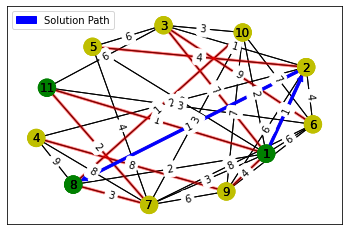

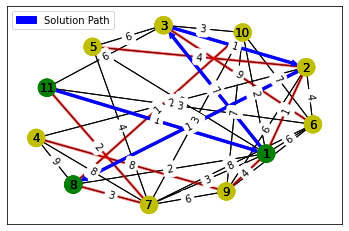

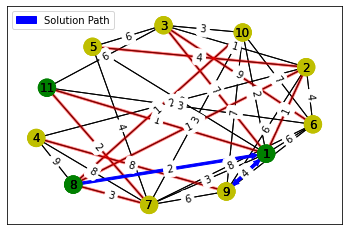

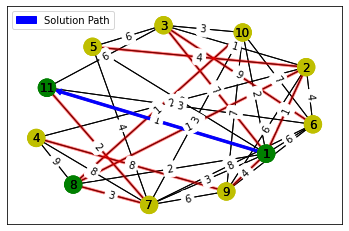

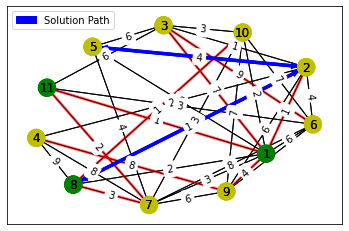

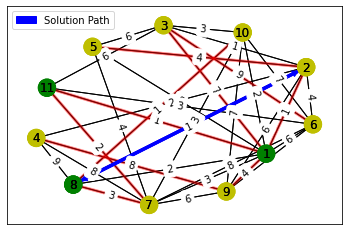

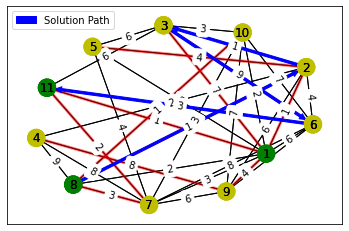

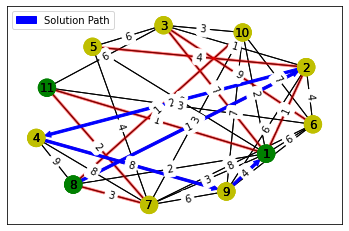

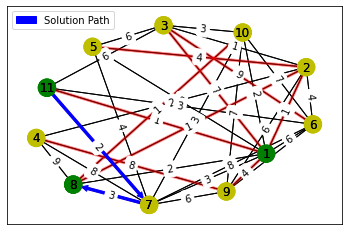

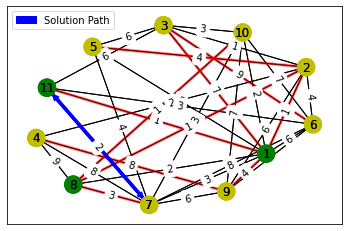

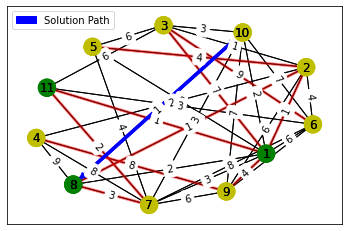

11 out of 11 is Traversed.
Success rate is 100.0%.
Maximum of all path cost = 15.0
Number of times drones had to recharge = 8
Total cost of all paths + recharge cost = 363.0
Execution took 0.014959096908569336 seconds.


6
Task Allocation Algorithm Output: 
Allocating arc 1 - 4 to base station - node 1
Allocating arc 1 - 9 to base station - node 1
Allocating arc 1 - 11 to base station - node 7
Allocating arc 2 - 4 to base station - node 7
Allocating arc 2 - 5 to base station - node 4
Allocating arc 3 - 7 to base station - node 4
Could not allocate edge 3 - 10 to any base stations
Could not allocate edge 4 - 5 to any base stations
Could not allocate edge 4 - 6 to any base stations
Could not allocate edge 4 - 7 to any base stations
Could not allocate edge 5 - 7 to any base stations
Could not allocate edge 5 - 11 to any base stations
Could not allocate edge 7 - 9 to any base stations
Could not allocate edge 7 - 10 to any base stations
Path Scanning Algorithm Output: 
Task Allocation Algor

Task Allocation Algorithm Output: 
Allocating arc 1 - 27 to base station - node 1
Allocating arc 6 - 7 to base station - node 10
Allocating arc 6 - 10 to base station - node 3
Allocating arc 7 - 11 to base station - node 13
Allocating arc 13 - 15 to base station - node 13
Allocating arc 14 - 16 to base station - node 16
Could not allocate edge 14 - 18 to any base stations
Could not allocate edge 14 - 20 to any base stations
Could not allocate edge 21 - 23 to any base stations
Could not allocate edge 23 - 26 to any base stations
Could not allocate edge 26 - 27 to any base stations
Path Scanning Algorithm Output: 
Task Allocation Algorithm Output: 
Allocating arc 7 - 11 to base station - node 10
Allocating arc 14 - 18 to base station - node 13
Allocating arc 14 - 20 to base station - node 13
Allocating arc 21 - 23 to base station - node 16
Allocating arc 23 - 26 to base station - node 1
Allocating arc 26 - 27 to base station - node 10
Path Scanning Algorithm Output: 
Task Allocation Algo

Task Allocation Algorithm Output: 
Allocating arc 21 - 23 to base station - node 13
Allocating arc 23 - 26 to base station - node 1
Allocating arc 26 - 27 to base station - node 13
Path Scanning Algorithm Output: 
Task Allocation Algorithm Output: 
Allocating arc 21 - 23 to base station - node 13
Allocating arc 23 - 26 to base station - node 1
Allocating arc 26 - 27 to base station - node 13
Path Scanning Algorithm Output: 
Task Allocation Algorithm Output: 
Allocating arc 21 - 23 to base station - node 13
Allocating arc 23 - 26 to base station - node 1
Allocating arc 26 - 27 to base station - node 13
Path Scanning Algorithm Output: 
Task Allocation Algorithm Output: 
Allocating arc 21 - 23 to base station - node 13
Allocating arc 23 - 26 to base station - node 1
Allocating arc 26 - 27 to base station - node 13
Path Scanning Algorithm Output: 
Task Allocation Algorithm Output: 
Allocating arc 21 - 23 to base station - node 13
Allocating arc 23 - 26 to base station - node 1
Allocating a

Path Scanning Algorithm Output: 
Task Allocation Algorithm Output: 
Allocating arc 7 - 11 to base station - node 9
Allocating arc 21 - 25 to base station - node 22
Path Scanning Algorithm Output: 
Task Allocation Algorithm Output: 
Allocating arc 7 - 11 to base station - node 9
Allocating arc 21 - 25 to base station - node 22
Path Scanning Algorithm Output: 
Task Allocation Algorithm Output: 
Allocating arc 7 - 11 to base station - node 9
Allocating arc 21 - 25 to base station - node 22
Path Scanning Algorithm Output: 
Task Allocation Algorithm Output: 
Allocating arc 7 - 11 to base station - node 9
Allocating arc 21 - 25 to base station - node 22
Path Scanning Algorithm Output: 
Task Allocation Algorithm Output: 
Allocating arc 7 - 11 to base station - node 9
Allocating arc 21 - 25 to base station - node 22
Path Scanning Algorithm Output: 
Task Allocation Algorithm Output: 
Allocating arc 7 - 11 to base station - node 9
Allocating arc 21 - 25 to base station - node 22
Path Scanning Al

Path Scanning Algorithm Output: 
Task Allocation Algorithm Output: 
Allocating arc 7 - 11 to base station - node 9
Allocating arc 21 - 25 to base station - node 22
Path Scanning Algorithm Output: 
Task Allocation Algorithm Output: 
Allocating arc 7 - 11 to base station - node 9
Allocating arc 21 - 25 to base station - node 22
Path Scanning Algorithm Output: 
Task Allocation Algorithm Output: 
Allocating arc 7 - 11 to base station - node 9
Allocating arc 21 - 25 to base station - node 22
Path Scanning Algorithm Output: 
Task Allocation Algorithm Output: 
Allocating arc 7 - 11 to base station - node 9
Allocating arc 21 - 25 to base station - node 22
Path Scanning Algorithm Output: 
Task Allocation Algorithm Output: 
Allocating arc 7 - 11 to base station - node 9
Allocating arc 21 - 25 to base station - node 22
Path Scanning Algorithm Output: 
Task Allocation Algorithm Output: 
Allocating arc 7 - 11 to base station - node 9
Allocating arc 21 - 25 to base station - node 22
Path Scanning Al

In [14]:
def main():
    # Initializing Parameters
#     vehicleCapacity = 14
#     numNodes = 8
#     requiredNodes = [[2, 4], [6, 7], [3, 4]]
#     depotNodes = [1, 5]
#     uavsInDepotNodes = [1, 1]
#     rechargeTime = 20
      
    position = list(np.load('../../dataset/graph info/pos.npy', allow_pickle=True))
    nodeColor = list(np.load('../../dataset/graph info/node_color.npy', allow_pickle=True))
    depotNodeColor = list(np.load('../../dataset/graph info/depot_node_color.npy', allow_pickle=True))
    Edges = list(np.load('../../dataset/graph info/edges.npy', allow_pickle=True))
    vehCap = list(np.load('../../dataset/graph info/vehicleCapacity.npy', allow_pickle=True))
    nuNod = list(np.load('../../dataset/graph info/numNodes.npy', allow_pickle=True))
    reqNod = list(np.load('../../dataset/graph info/requiredNodes.npy', allow_pickle=True))
    deNo = list(np.load('../../dataset/graph info/depotNodes.npy', allow_pickle=True))
    
    info = readAndStoreInstanceInfo('../../dataset/CARP_datasets/DeArmon_gdb-IF')
    instanceData = {'Instance Name' : [],
                    'Number of Nodes' : [],
                    'Number of Edges' : [],
                    'Number of Required Edges' : [],
                    'Capacity' : [],
                    'Number of Depot Nodes' : []}

    algoOutputData = {'Execution Time' : [],
                      'Maximum Cost' : [],
                      'Total Cost' : [],
                      'Number of Recharges' : [],
                      'Number of Desired Edges Traversed' : [],
                      'Success Rate' : []}
    
    folderPath = '../../dataset/graph files'
    for i, file in enumerate(os.listdir(folderPath)):
        if file.endswith(".pkl"):
            index = int(file.split('.')[0])
            file_path = f"{folderPath}/{file}"
            
            G = nx.read_gpickle(file_path)
            pos = position[index]
            node_color = nodeColor[index]
            depot_node_color = depotNodeColor[index]
            edges = Edges[index]
            depotNodes = deNo[index]
            requiredNodes = reqNod[index]
            vehicleCapacity = vehCap[index]
            numNodes = nuNod[index]
            uavsInDepotNodes = [len(requiredNodes)//(2*len(depotNodes))]*len(depotNodes)
            rechargeTime = 2*vehicleCapacity
            instanceData['Instance Name'].append(info['Instance Name'][index])
            instanceData['Number of Nodes'].append(numNodes)
            instanceData['Number of Edges'].append(len(edges))
            instanceData['Number of Required Edges'].append(len(requiredNodes))
            instanceData['Capacity'].append(vehicleCapacity)
            instanceData['Number of Depot Nodes'].append(len(depotNodes))
            
#     G,pos, node_color, depot_node_color, edges, depotNodes, requiredNodes, vehicleCapacity, numNodes = createGraph()
#     uavsInDepotNodes = [len(requiredNodes)//(2*len(depotNodes))]*len(depotNodes)
#     rechargeTime = 2*vehicleCapacity
    
            # Declaring useful paramerters
            numrequiredEdges = len(requiredNodes)
            desiredEdgeTravesed = [False]*numrequiredEdges
            numRecharge = 0
            iterations = 0
            uavs = []
            allRoutes = []
            allRoutesCosts = []
            for element in uavsInDepotNodes:
                l = [0]*element
                heapq.heapify(l)
                uavs.append(l)
            penality = 0
            print(sum(uavsInDepotNodes))
            start = time.time()
        #     G,pos, depot_node_color = createGraph(depotNodes, requiredNodes, numNodes, show=False)

            while not all(edges == True for edges in desiredEdgeTravesed):
                if iterations <= sum(uavsInDepotNodes)*numrequiredEdges:
                    bestPathTillDesiredEdge, bestCostTillDesiredEdge = taskAllocation(G, depotNodes, requiredNodes, desiredEdgeTravesed, numrequiredEdges, uavsInDepotNodes)
            #         visualizePath(depotNodes, requiredNodes, numNodes, bestPathTillDesiredEdge, pathType="normal")
                    bestRoute, bestRouteCost, uavs, desiredEdgeTravesed, uavsInDepotNodes, numRecharge = pathScanningAlgorithm(G, numrequiredEdges,
                                                                                                                                 depotNodes, uavsInDepotNodes,
                                                                                                                                 desiredEdgeTravesed, uavs,
                                                                                                                                 bestPathTillDesiredEdge, bestCostTillDesiredEdge,
                                                                                                                                 vehicleCapacity, rechargeTime, numRecharge)

                   
            #         visualizePath(depotNodes, requiredNodes, numNodes, bestRoute)
                    for i in range(len(bestRoute)):
                        if bestRoute[i] != None:
                            allRoutes.append(bestRoute[i])
                            allRoutesCosts.append(bestRouteCost[i])
                else:
                    break
                iterations += 1
            
#             allRoutes, allRoutesCosts = tabuSearch(G, allRoutes, allRoutesCosts, requiredNodes, depotNodes)
            end = time.time()
        #     visualizePath(depotNodes, requiredNodes, numNodes, allRoutes)
            if i == 10:
                print(instanceData['Instance Name'][-1])
                visualizePath(G,pos, node_color, depot_node_color, edges, depotNodes, requiredNodes, numNodes, allRoutes)
            print(str(desiredEdgeTravesed.count(True)) + ' out of '+ str(len(desiredEdgeTravesed)) + ' is Traversed.')
            print('Success rate is ' + str((desiredEdgeTravesed.count(True)/len(desiredEdgeTravesed))*100) + '%.')
            print('Maximum of all path cost = ' + str(max(allRoutesCosts)))
            print('Number of times drones had to recharge = ' + str(numRecharge))
            print('Total cost of all paths + recharge cost = ' + str(sum(allRoutesCosts) + rechargeTime*numRecharge))
            print("Execution took "+ str(end-start) + " seconds.")
            algoOutputData['Execution Time'].append(round(end-start, 3))
            algoOutputData['Maximum Cost'].append(max(allRoutesCosts))
            algoOutputData['Total Cost'].append(sum(allRoutesCosts) + rechargeTime*numRecharge)
            algoOutputData['Number of Recharges'].append(numRecharge)
            algoOutputData['Number of Desired Edges Traversed'].append(desiredEdgeTravesed.count(True))
            algoOutputData['Success Rate'].append((desiredEdgeTravesed.count(True)/len(desiredEdgeTravesed))*100)
            print()
            print()
#             df = pd.DataFrame(instanceData)
#             df.to_csv('../../dataset/dataset_info.csv')
            
            df = pd.DataFrame(algoOutputData)
            df.to_csv('../../dataset/algo_output_info.csv')
            
if __name__ == "__main__":
    # execute only if run as a script
    main()

In [72]:
a,b,c = nodeIndex(bestRoute[0], 5, 0, requiredNodes)
print(a,b,c)

TypeError: nodeIndex() takes 3 positional arguments but 4 were given

In [11]:
route = [[1,3,4,2,1], [1,2,4,7,8,5], [1,2,4,3,1], [1,2,4,6,7,8,5]]
routeCost = []

for r in route:
    cost = 0
    for i in range(len(r)-1):
        cost += G.get_edge_data(r[i], r[i+1])['weight']
    routeCost.append(cost)

print(routeCost)
visualizePath(depotNodes, requiredNodes, numNodes, route, pathType="normal")

NameError: name 'G' is not defined